# Data Exploration

## 1. Load Pager Duty Incident Data
###   - From Jan 2017 to Sep 2019

In [86]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import datetime
%matplotlib notebook

from IPython.display import display, HTML

directory = "../incident_prioritization/incidents"
incidents = pd.DataFrame(columns=['id', 'incident_number', 'description', 'service_id', 'service_name',
                           'escalation_policy_id','escalation_policy_name','created_on', 'resolved_on'
                           'seconds_to_first_ack','seconds_to_resolve', 'auto_resolved', 
                           'escalation_count', 'auto_escalation_count', 'acknowledge_count',
                           'assignment_count', 'acknowledged_by_user_ids','acknowledged_by_user_names', 
                           'assigned_to_user_ids','resolved_by_user_id','urgency'])
for root,dirs,files in os.walk(directory):
    for file in files:
        #print(file)
        temp = pd.read_csv("../incident_prioritization/incidents/" + file)
        incidents = incidents.append(temp)
incidents.to_csv("../incident_prioritization/all.csv")
#incidents.describe()
#print(len(incidents))

/Users/a071887/pdip/venv/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


seconds_to_first_ack
count          1.784590e+05
mean           2.342812e+04
std            2.966711e+05
min            0.000000e+00
25%            1.700000e+01
50%            2.900000e+01
75%            8.400000e+01
max            8.169765e+06

In [87]:
import pandas as pd
import os
import datetime
from IPython.display import display, HTML
%matplotlib notebook
from matplotlib import pyplot as plt

all = pd.read_csv("../incident_prioritization/all.csv")
compact = all[['created_on','resolved_on','service_name','description','seconds_to_resolve','urgency']].copy()

## Extract date and time from datetime column

In [295]:
compact['created_date'] = [datetime.datetime.date(pd.to_datetime(d,utc=True)) for d in compact['created_on']]
compact['created_time'] = [datetime.datetime.time(pd.to_datetime(d,utc=True)) for d in compact['created_on']]
compact['created_datetime'] = [pd.to_datetime(d,utc=True) for d in compact['created_on']]
compact_datetime = compact

In [296]:
temp1 = compact_datetime[~compact_datetime.service_name.str.contains("BCOM")]
temp2 = temp1[~temp1.service_name.str.contains("STARS")]
temp3 = temp2[~temp2.service_name.str.contains("DaaS")]
temp4 = temp3[~temp3.service_name.str.contains("EDPOC")]
temp5 = temp4[~temp4.service_name.str.contains("TEST")]
temp6 = temp5[~temp5.service_name.str.contains("perf tasks")]
temp7 = temp6[~temp6.service_name.str.contains("escalation")]
temp8 = temp7[~temp7.service_name.str.contains("prometheus")]
temp9 = temp8[~temp8.service_name.str.contains("stella")]
temp10 = temp9[~temp9.service_name.str.contains("Stackdriver")]
temp11 = temp10[~temp10.service_name.str.contains("Test")]
temp12 = temp11[~temp11.service_name.str.contains("EMLP")]
temp13 = temp12[~temp12.service_name.str.contains("testing")]
temp14 = temp13[~temp13.service_name.str.contains("Demo")]
temp15 = temp14[~temp14.service_name.str.contains("Default")]
temp16 = temp15[~temp15.service_name.str.contains("Escalation")]
temp17 = temp16[~temp16.service_name.str.contains("Escalations")]
filtered_incidents = temp17[~temp17.service_name.str.contains("Perf")]
filtered_pd_incidents = filtered_incidents
filtered_pd_incidents

servicenames = filtered_pd_incidents.service_name.unique()
#servicenames



## Work on subset of data

<IPython.core.display.Javascript object>


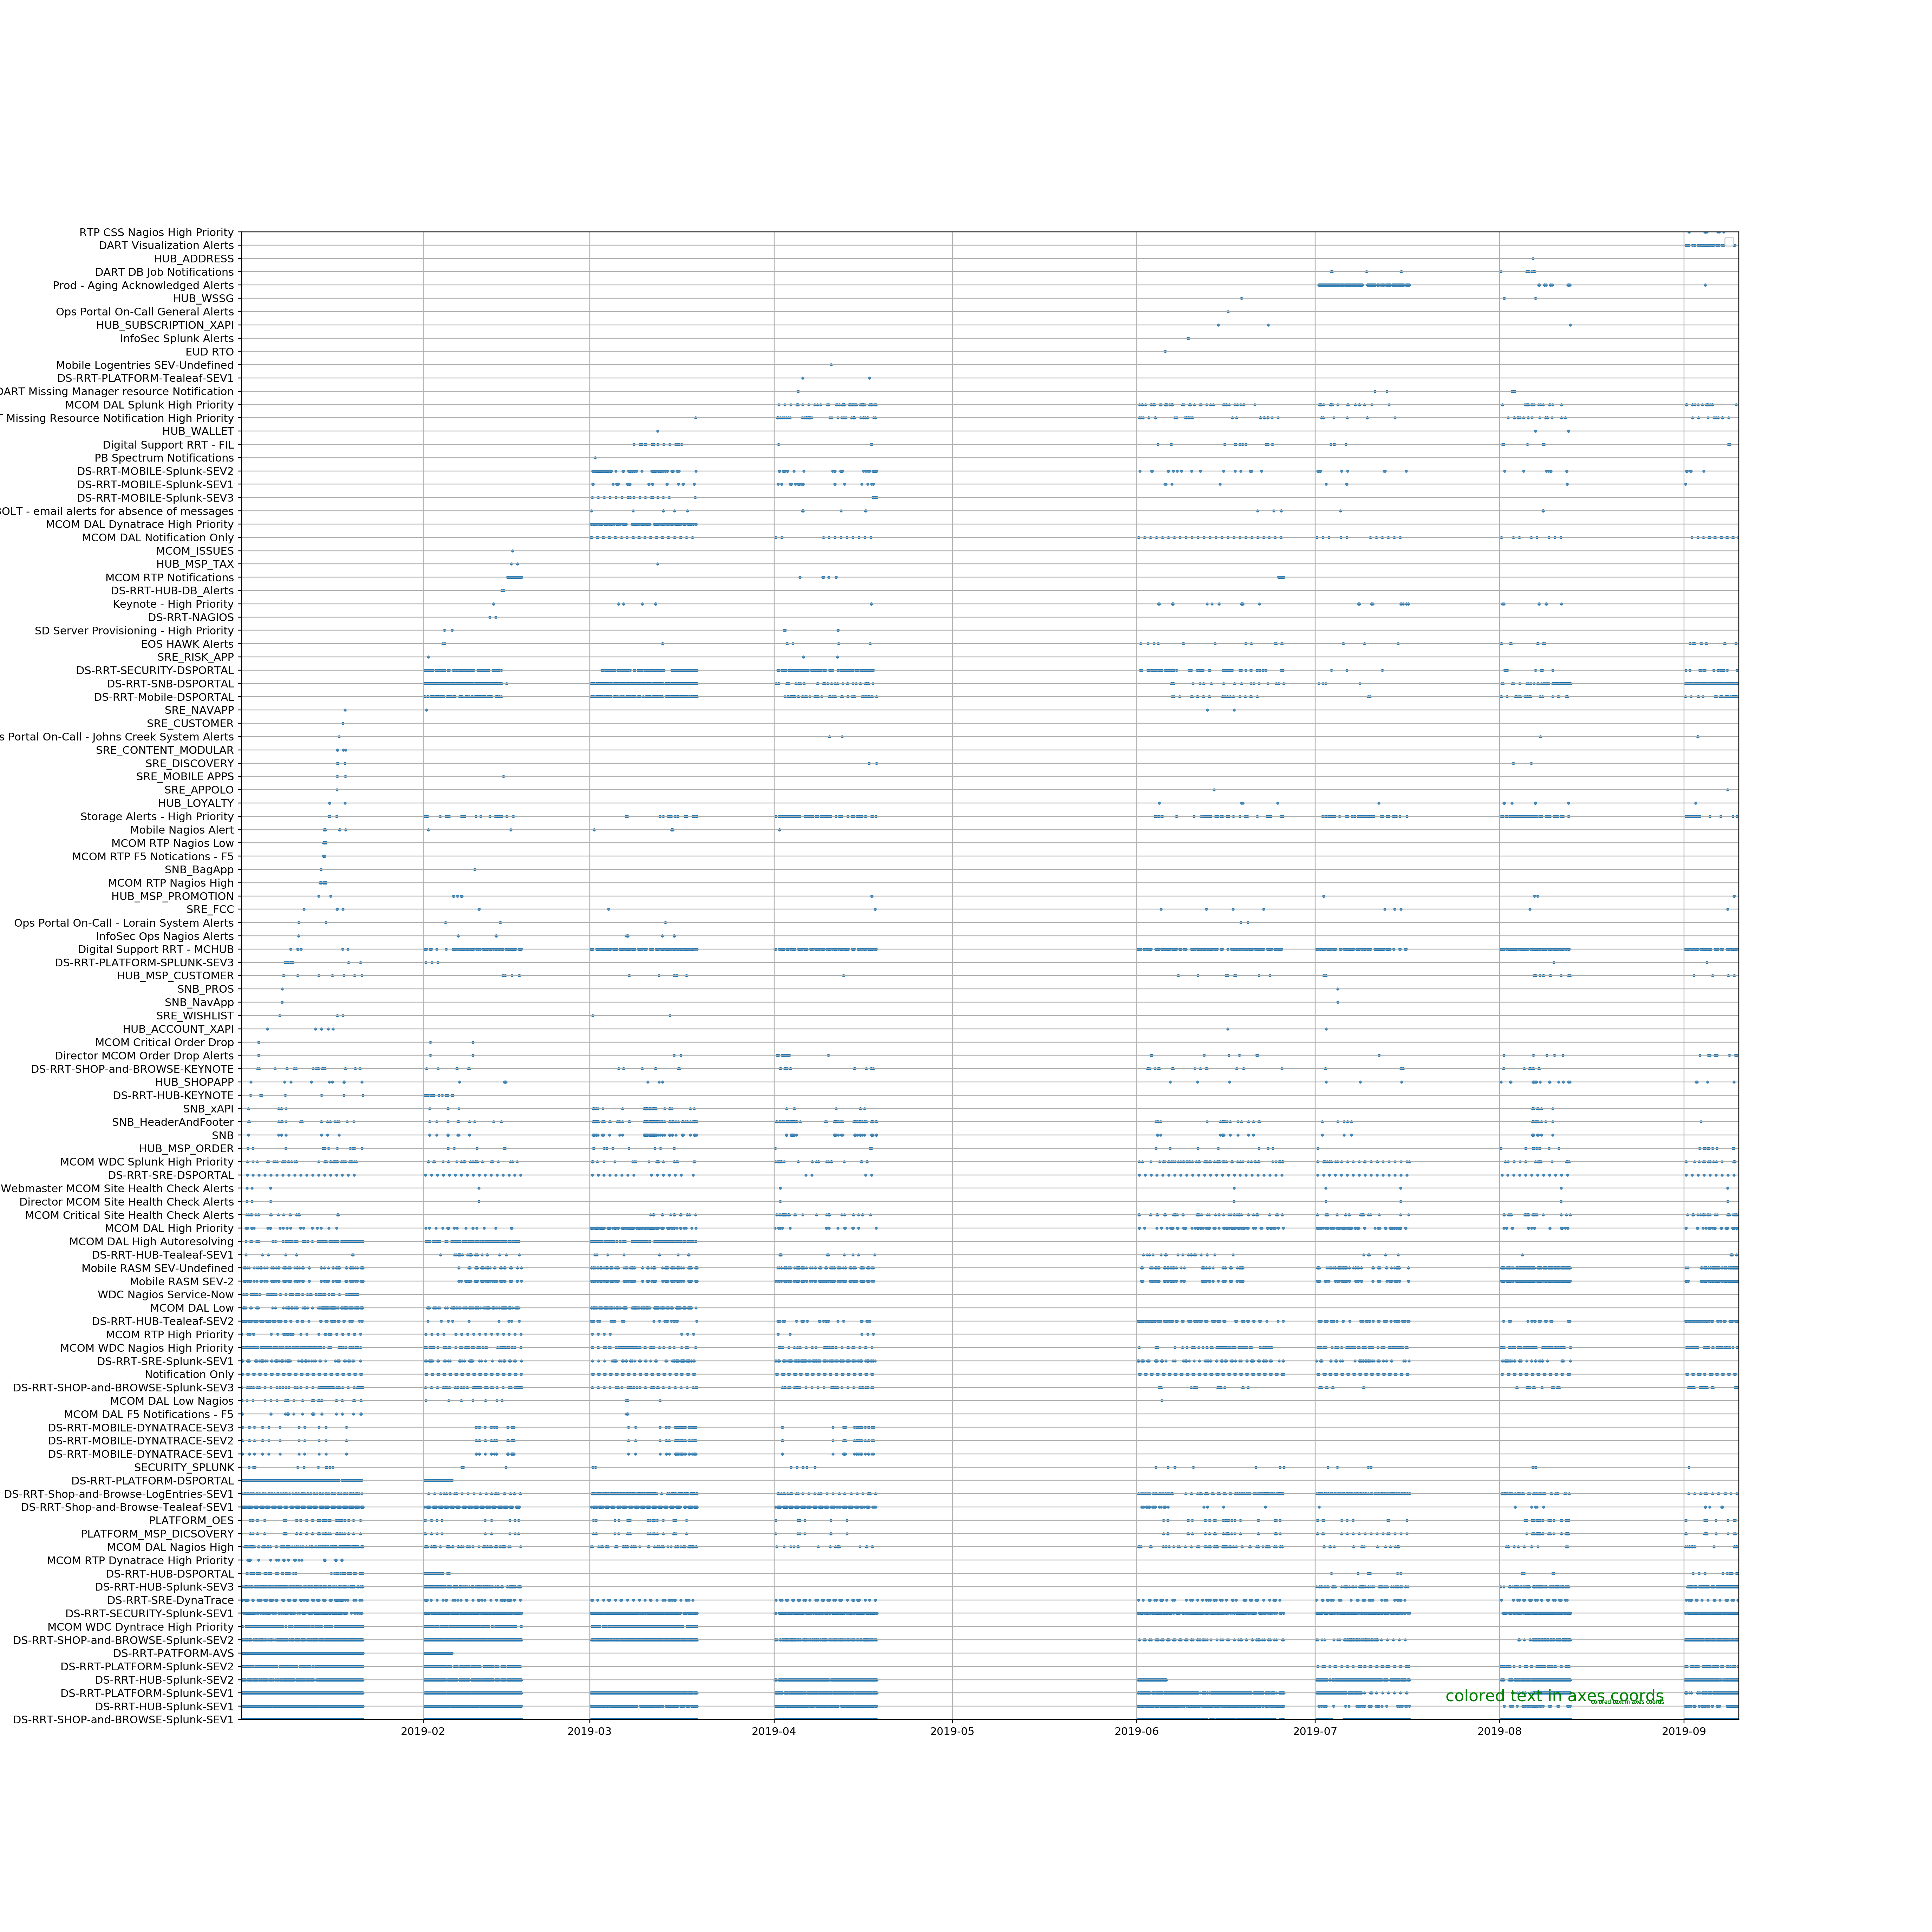

In [297]:
import PyQt5

%matplotlib notebook
startdate = pd.to_datetime("2019-01-01",utc=True).date()
enddate = pd.to_datetime("2019-11-30",utc=True).date()
filtered_pd_incidents.set_index('created_date')
mask = (filtered_pd_incidents['created_date'] >= startdate) & (filtered_pd_incidents['created_date'] <= enddate)
june2019 = filtered_pd_incidents.loc[mask]
fig, ax = plt.subplots(figsize=(25,25))
ax.margins(x=-0.001, y=0)
grouped = june2019.groupby(['created_datetime','created_time','service_name']).count()['description'].reset_index()
pd.set_option('display.max_rows', 5000)
grouped
ax.scatter(grouped['created_datetime'],grouped['service_name'],3)
ax.grid(True)

## Load sev1 issues from weekly report

In [298]:

all_jira = pd.read_csv("../incident_prioritization/jira_filtered.csv")
all_jira.set_index('Created')

sev_compact = all_jira[['Created','Summary','Description','Custom field (Brand)','Custom field (Channel)','Custom field (Component)']].copy()

#sev_compact

In [300]:

sev_compact['created_date'] = [datetime.datetime.date(pd.to_datetime(d,utc=True)) for d in sev_compact['Created']]
sev_compact['created_time'] = [datetime.datetime.time(pd.to_datetime(d,utc=True)) for d in sev_compact['Created']]
sev_compact['created_datetime'] = [pd.to_datetime(d,utc=True) for d in sev_compact['Created']]
sev_compact['service_name'] = ['jira_sev1_issue' for d in sev_compact['Created']]
sev_compact['description'] = [sev_compact['Description'] for d in sev_compact['Description']]
sev_compact.set_index('created_date')
sev_compact_datetime = sev_compact
#sev_compact_datetime

In [301]:
startdate = pd.to_datetime("2019-01-01").date()
enddate = pd.to_datetime("2019-11-30").date()
sev_mask = (sev_compact['created_date'] >= startdate) & (sev_compact['created_date'] <= enddate)
sev_june2019 = sev_compact_datetime.loc[sev_mask]
sev_grouped = sev_june2019.groupby(['created_datetime','created_time','service_name']).count()['description'].reset_index()
sev_plus_grouped = grouped.append(sev_grouped)
#%matplotlib notebook
fig1, ax1 = plt.subplots(figsize=(25,100))
servicenamelist = sev_plus_grouped.service_name.unique()
for servicename in servicenamelist:
    if servicename == 'jira_sev1_issue':
        color = 'red'
        scale = 50
        ax1.margins(x=-0.01, y=0)
        ax1.scatter(sev_grouped['created_datetime'],sev_grouped['service_name'],c=color,s=scale)
    else:
        color = 'blue'
        scale = 3
        ax1.margins(x=-0.01, y=0)
        ax1.scatter(grouped['created_datetime'],grouped['service_name'],c=color,s=scale)
# . ax1.scatter(grouped['created_datetime'],servicename,c=color,s=scale)
#    n = 750
#    x, y = np.random.rand(2, n)
#    scale = 200.0 * np.random.rand(n)
    
#(x, y, c=color, s=scale, label=color,
#               alpha=0.3, edgecolors='none')

ax.legend()
ax1.grid(True)

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


In [302]:
tempj1 = sev_compact_datetime[~sev_compact_datetime['Custom field (Component)'].str.contains("MSP-Order")]
order_to_batch_jira = tempj1[~tempj1['Summary'].str.contains("Orders To Batch")]
order_to_batch_jira #['created_datetime'].unique

Created                                            Summary  \
0   11/27/19 10:15                    Andriod Order Dip  12:26 PM EST   
1   11/25/19 20:04                    MCOM & BCOM: Order Drop - 11/25   
3   10/23/19 19:58   Order Drop in MCOM/BCOM - WDC 10/23 06.36 PM ...   
4    10/23/19 2:19  Disable batch mode for 19.17 environments mcom...   
7     10/8/19 3:29     MCOM (WDC) Order drop @9:07 PM to 10:14 PM EST   
10    9/9/19 15:06                                    Order Drop-MCOM   
11    8/31/19 7:44                MCOM iOS & Android orders trend low   
13    8/22/19 3:35                 Orders to Batch @05:57 AM (08/22)    
17   8/12/19 13:39  12/08 - MCOM (Brand) Health Status: Critical @...   
22   7/29/19 12:44  Order Drop in MCOM @ MCOM DAL 19.11 Code Relea...   
23   7/29/19 12:15            Orders to batch for  both MCOM and BCOM   
29    7/2/19 17:00     Sev1 >> Order drop in MCOM- WDC at 06:45PM ET.   
30    7/2/19 15:20          Order dip on MCOM at 02:21 PM ET on 07/02   
31   6/25/19 15:18  Search and Send Order drop on 6/25 at 01:00 PM ET   
33    6/6/19 13:26  Browse conversion dip on June 3rd and 4th 2019...   
34   5/21/19 12:12                 Add missing TAX Properties on PROD   
37    4/1/19 23:06  order drop - MCOM DAL for 5 mins between  16.5...   
38    4/1/19 20:50  MCOM Order Drop 04/01/2019 @ 07:52 PM ET to 08...   
39   3/24/19 14:28  Orders to batch from 03/24/2019 5.00 PM onward...   
40   3/12/19 22:03   orders to batch for MCOM&BCOM from 12:36AM 03/13   
41   3/11/19 11:46  Order drop in Android and iOS apps between 2:0...   
42     2/9/19 3:02           Order to batch for MCOM and BCOM - 02/09   
43    2/4/19 21:40     Orders to batch on both MCOM  and BCOM @ 12:03   
44   1/31/19 13:32  Orders moved to batch between 31/01 16:01 to 1...   
45   1/10/19 17:29  MCOM & BCOM Orders went to batch from 07:49 PM...   
46    1/9/19 16:43  Order dip on MCOM from 04:00 PM EST to 04:05PM...   

                                          Description Custom field (Brand)  \
0                 !image-2019-11-27-23-44-36-879.png!                 MCOM   
1                 !image-2019-11-25-23-03-48-298.png!        MCOM and BCOM   
3    Order Drop in MCOM/BCOM - WDC 10/23 06.36 PM ...        MCOM and BCOM   
4   The real/online mode is required on mcom-148 a...                 MCOM   
7      MCOM (WDC) Order drop @9:37 PM to 10:14 PM EST                 MCOM   
10                                Order drop on mcom.                 MCOM   
11  MCOM iOS and Android orders trend is too low. ...        MCOM and BCOM   
13                 Orders to Batch @05:57 AM (08/22)         MCOM and BCOM   
17  MCOM (Brand) Health Status: Critical @ 4:13 PM...                 MCOM   
22  Order drop is identified in MCOM post moving t...                 MCOM   
23  Order to batch from 11:17 AM EST  to 11:32 AM ...        MCOM and BCOM   
29  Sev1 >> Order drop in MCOM- WDC.\r\n\r\nMacys....                 MCOM   
30          Order dip on MCOM at 02:21 PM ET on 07/02                 MCOM   
31  Search and Send Order drop on 6/25 at 01:00 PM...                 MCOM   
33  All dates are in mm/dd/yyyy format.\r\n\r\nWe ...                 MCOM   
34  externalservice.MocTaxServiceGetMocSalesTaxAda...                 MCOM   
37  Oder drop observed for 5 mins and auto-recover...                 MCOM   
38  MCOM Order Drop 04/01/2019 @ 07:52 PM ET to 08...                 MCOM   
39  Observing orders to batch from 03/24/2019 5.00...        MCOM and BCOM   
40   orders to batch for MCOM&BCOM from 12:36AM 03/13        MCOM and BCOM   
41  Observed 0 orders for Android and iOS app betw...                 MCOM   
42        Orders to batch from 02:43 to 02:48 AM EST.        MCOM and BCOM   
43  Orders to batch on both MCOM  and BCOM @ 12:03...        MCOM and BCOM   
44  Orders moved to batch between 31/01 16:01 to 1...        MCOM and BCOM   
45  INC0269484 >> MCOM & BCOM Orders went to batch...                 MCOM   
46         

In [318]:

fig1, axs = plt.subplots(1,2)

#Filter JIRA for 2019-08-01 10:59:00
startdatetime = pd.to_datetime("2019-08-12 12:00:00",utc=True)
enddatetime = pd.to_datetime("2019-08-12 14:00:00",utc=True)
filtered_incidents.set_index('created_datetime')
filtered_incidents
mask = (filtered_incidents['created_datetime'] >= startdatetime) & (filtered_incidents['created_datetime'] <= enddatetime)
pd_incidents_20190801_105900 = filtered_incidents.loc[mask]
#pd_incidents_20190801_105900
jira_mask = (order_to_batch_jira['created_datetime'] >= startdatetime) & (order_to_batch_jira['created_datetime'] <= enddatetime)
jira_20190801_105900 = order_to_batch_jira.loc[jira_mask]
#jira_20190801_105900
#order_to_batch_jira
jira_grouped = jira_20190801_105900.groupby(['created_datetime','created_time','service_name']).count()['description'].reset_index()
#jira_grouped
pd_incidents_grouped = pd_incidents_20190801_105900.groupby(['created_datetime','created_time','service_name']).count()['description'].reset_index()
#pd_incidents_grouped
jira_plus_pd_grouped = pd_incidents_grouped.append(jira_grouped)
#jira_plus_pd_grouped
#%matplotlib notebook

servicenamelist = jira_plus_pd_grouped.service_name.unique()
#servicenamelist
for servicename in servicenamelist:
    if servicename == 'jira_sev1_issue':
        color = 'red'
        scale = 50
        axs[0].margins(x=-0.01, y=0)
        axs[0].scatter(jira_grouped['created_datetime'],jira_grouped['service_name'],c=color,s=scale)
    else:
        color = 'blue'
        scale = 3
        axs[0].margins(x=-0.01, y=0)
        axs[0].scatter(pd_incidents_grouped['created_datetime'],pd_incidents_grouped['service_name'],c=color,s=scale)
    axs[0].set_title('20190801_105900')    
    axs[0].grid(True)   



plt.xticks(rotation=90)
#plt.yticks(rotation=5)


<IPython.core.display.Javascript object>

KeyError: 'description'

In [327]:
import pandasql as ps
import numpy as np

order_to_batch_jira['created_datetime_plus_onehour'] = order_to_batch_jira.created_datetime + pd.DateOffset(hours=1)
order_to_batch_jira['created_datetime_minus_onehour'] = order_to_batch_jira.created_datetime - pd.DateOffset(hours=1)
sqlcode = '''
select  filtered_incidents.service_name pd_service_name, 
        filtered_incidents.description pd_description,
        filtered_incidents.created_datetime pd_created_datetime,
        order_to_batch_jira.created_datetime jira_created_datetime,
        order_to_batch_jira.service_name jira_service_name
from order_to_batch_jira
left outer join filtered_incidents on filtered_incidents.created_datetime >= order_to_batch_jira.created_datetime_minus_onehour 
and filtered_incidents.created_datetime <= order_to_batch_jira.created_datetime_plus_onehour
'''

combined = ps.sqldf(sqlcode,locals())
combined = combined.mask(combined.eq('None')).dropna()
combined['pd_created_datetime'] = [pd.to_datetime(d,utc=True) for d in combined['pd_created_datetime']]
combined['jira_created_datetime'] = [pd.to_datetime(d,utc=True) for d in combined['jira_created_datetime']]
combined


pd_service_name  \
5                      DS-RRT-HUB-Splunk-SEV1   
6                 DS-RRT-SECURITY-Splunk-SEV1   
7          DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
8          DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
9          DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
10                     DS-RRT-HUB-Splunk-SEV1   
11         DS-RRT-SHOP-and-BROWSE-Splunk-SEV3   
12         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
13         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
14         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
15                DS-RRT-SECURITY-Splunk-SEV1   
16                     DS-RRT-Mobile-DSPORTAL   
17         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
18         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
19                Digital Support RRT - MCHUB   
20                Digital Support RRT - MCHUB   
21                Digital Support RRT - MCHUB   
22                DS-RRT-SECURITY-Splunk-SEV1   
23         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
24                DS-RRT-SECURITY-Splunk-SEV1   
25         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
26         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
27         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
28            Director MCOM Order Drop Alerts   
29     MCOM Critical Site Health Check Alerts   
30                DS-RRT-SECURITY-Splunk-SEV1   
31                               PLATFORM_OES   
32                     PLATFORM_MSP_DICSOVERY   
33                     DS-RRT-HUB-Splunk-SEV2   
34         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
35                Digital Support RRT - MCHUB   
36                DS-RRT-PLATFORM-Splunk-SEV1   
37                     DS-RRT-HUB-Splunk-SEV2   
38                DS-RRT-SECURITY-Splunk-SEV1   
39         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
40         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
41         DS-RRT-SHOP-and-BROWSE-Splunk-SEV3   
42                     DS-RRT-HUB-Splunk-SEV2   
43         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
44         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
45                DS-RRT-SECURITY-Splunk-SEV1   
46         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
47         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
48         DS-RRT-SHOP-and-BROWSE-Splunk-SEV2   
49                     DS-RRT-HUB-Splunk-SEV3   
50         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
51                DS-RRT-SECURITY-Splunk-SEV1   
52         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
53         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
54                Digital Support RRT - MCHUB   
55         DS-RRT-SHOP-and-BROWSE-Splunk-SEV3   
56         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
57         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
58                     DS-RRT-Mobile-DSPORTAL   
59         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
60         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
61                  Mobile RASM SEV-Undefined   
62                          Mobile RASM SEV-2   
63                     DS-RRT-HUB-Splunk-SEV1   
64                     DS-RRT-HUB-Splunk-SEV1   
65         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
66                DS-RRT-SECURITY-Splunk-SEV1   
67         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
68         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
69                     DS-RRT-HUB-Splunk-SEV2   
70         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
71                DS-RRT-PLATFORM-Splunk-SEV1   
72         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
73         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
74                     DS-RRT-HUB-Splunk-SEV2   
75                DS-RRT-SECURITY-Splunk-SEV1   
76                     DS-RRT-HUB-Splunk-SEV2   
77         DS-RRT-SHOP-and-BROWSE-Splunk-SEV3   
78         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
79         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
80                DS-RRT-SECURITY-Splunk-SEV1   
81         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
82                     DS-RRT-HUB-Splunk-SEV2   
83                DS-RRT-PLATFORM-Splunk-SEV1   
84                DS-RRT-PLATFORM-Splunk-SEV1   
85         DS-RRT-SHOP-and-BROWSE-Splunk-SEV1   
86          

<IPython.core.display.Javascript object>


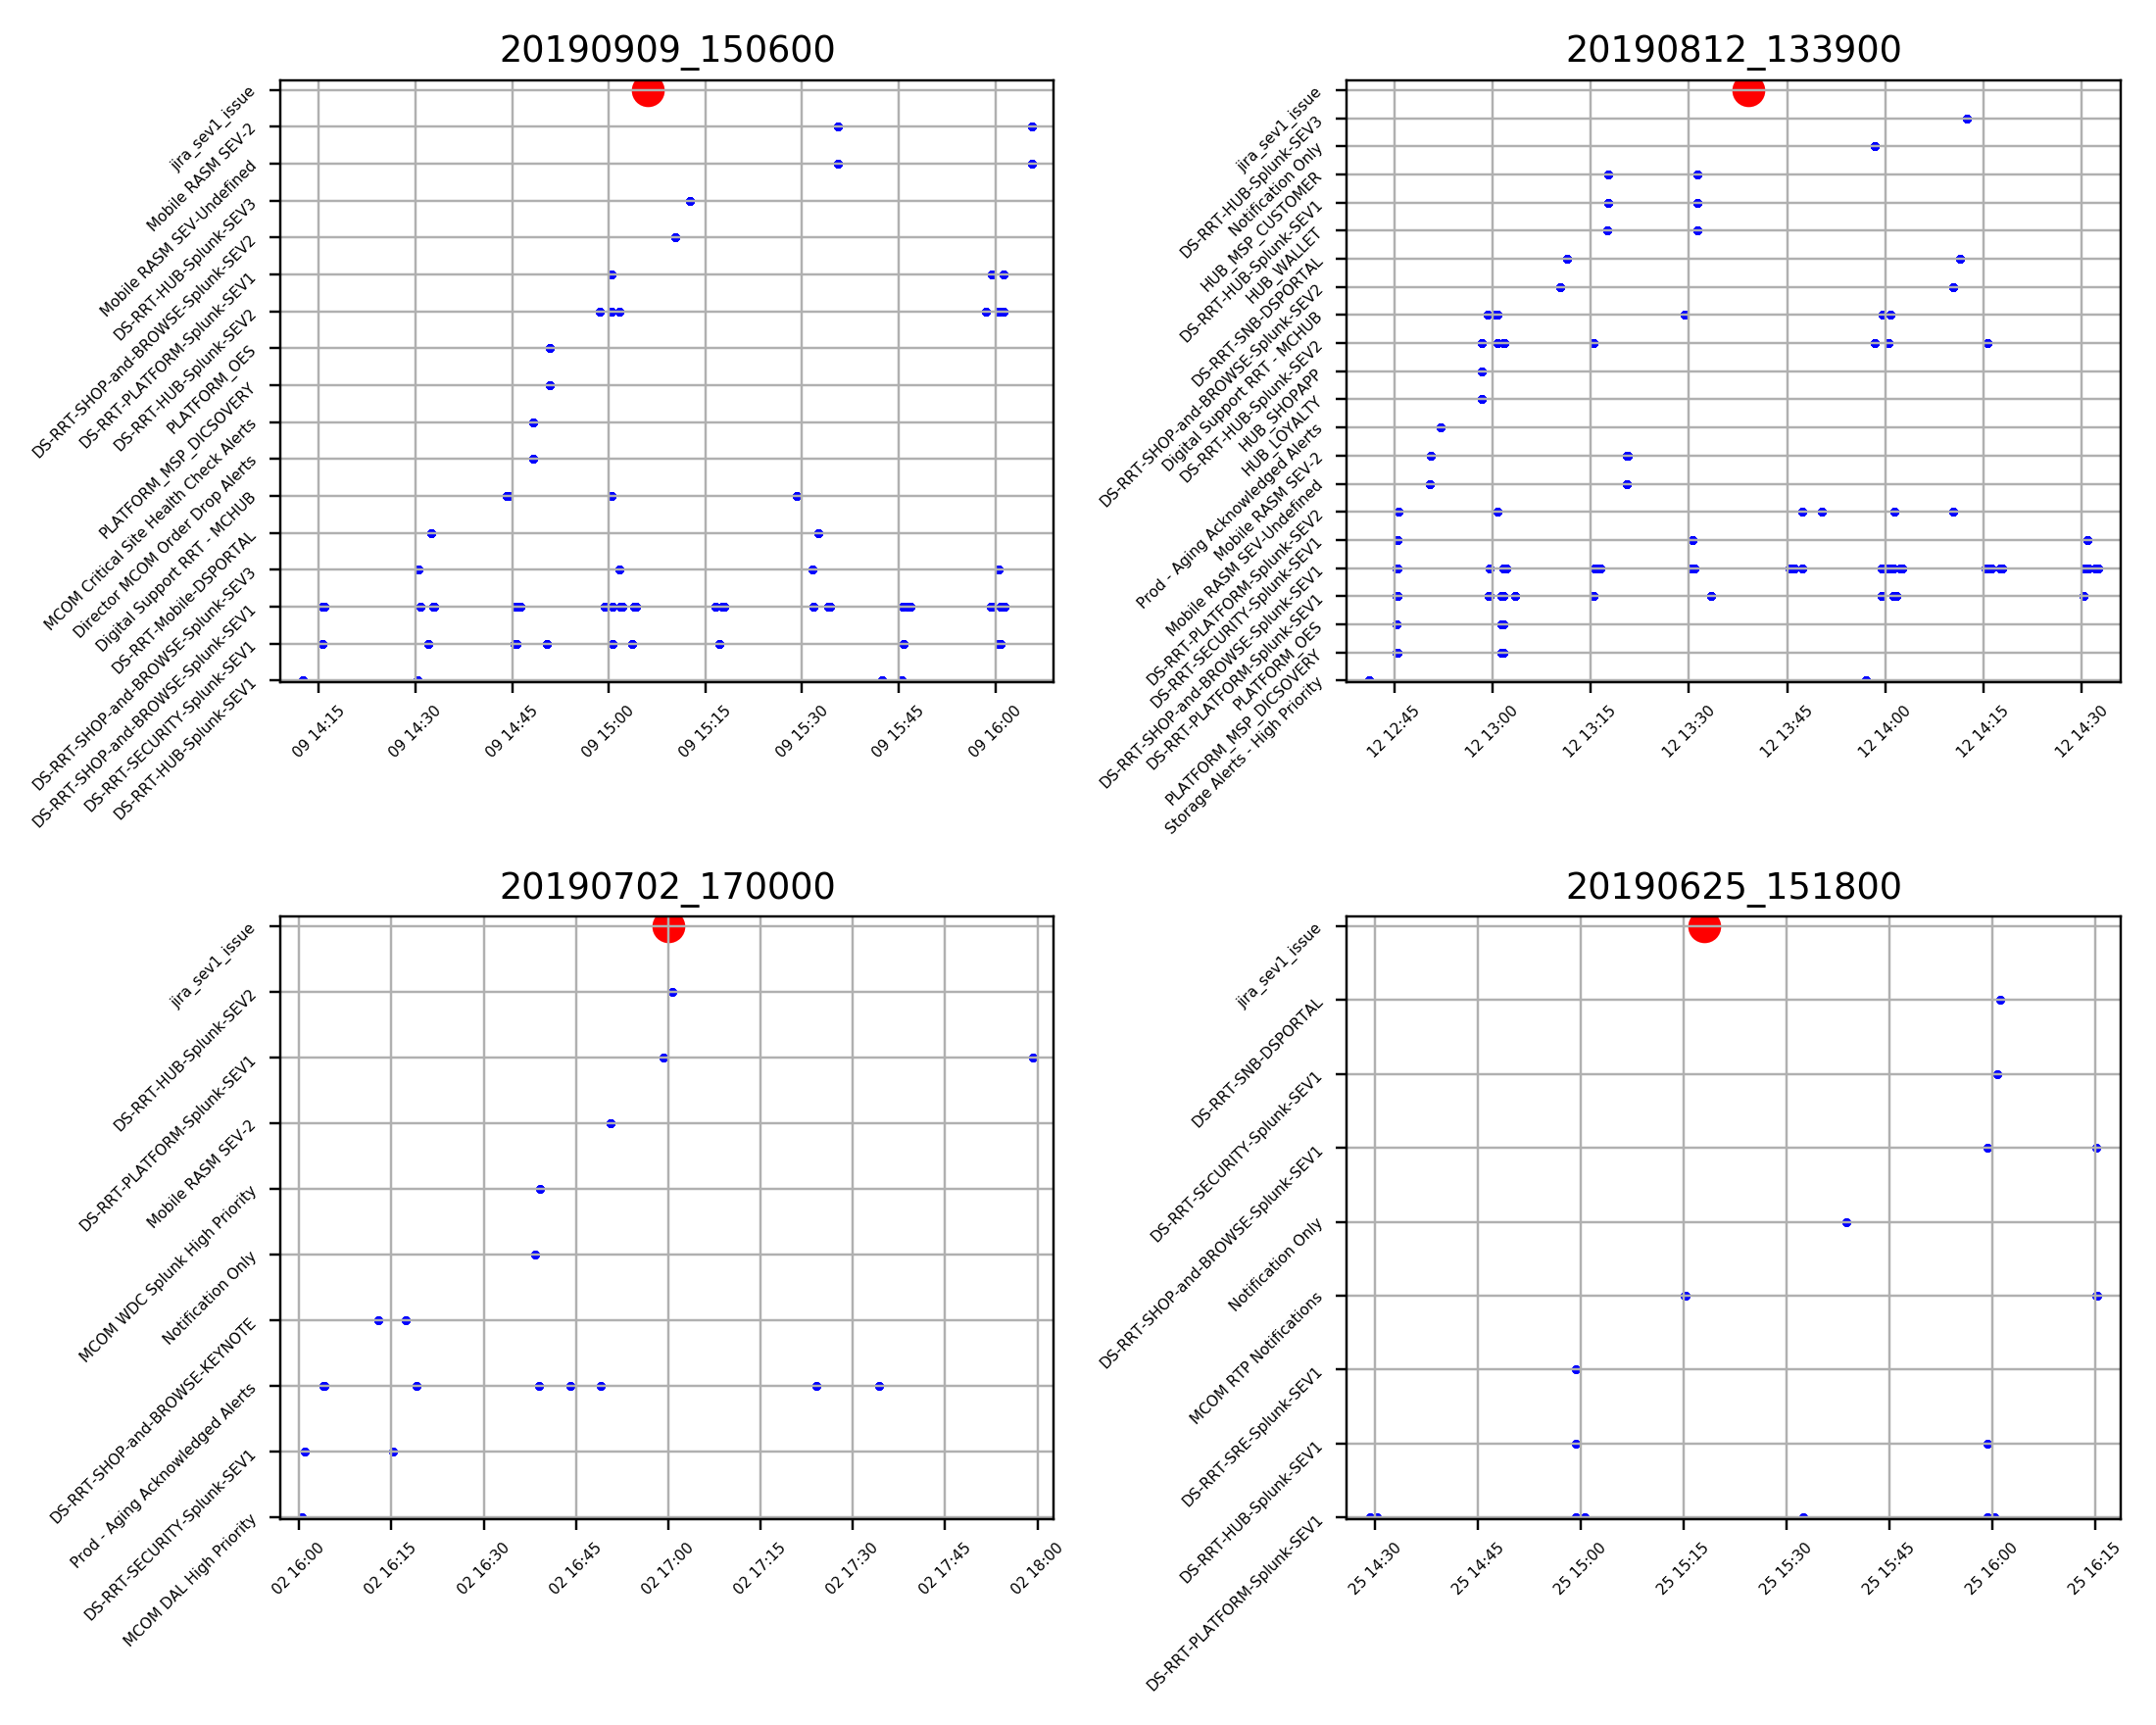

/Users/a071887/pdip/venv/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [395]:

fig2, axs = plt.subplots(2,2)
fig2.set_figheight(8)
fig2.set_figwidth(10)

#Filter JIRA for 2019-09-09 15:06:00
jira_created_datetime = pd.to_datetime("2019-09-09 15:06:00",utc=True)
mask = (combined['jira_created_datetime'] == jira_created_datetime)
pd_incidents_20190909_150600 = combined.loc[mask]
#pd_incidents_20190909_150600
jira_grouped = pd_incidents_20190909_150600.groupby(['jira_created_datetime','jira_service_name']).count()['pd_description'].reset_index()
#jira_grouped
pd_incidents_grouped = pd_incidents_20190909_150600.groupby(['pd_created_datetime','pd_service_name']).count()['pd_description'].reset_index()
#pd_incidents_grouped
jira_plus_pd_grouped = pd_incidents_grouped.append(jira_grouped)
#jira_plus_pd_grouped
#%matplotlib notebook

jiraservicenamelist = jira_grouped.jira_service_name.unique()
pdservicenamelist = pd_incidents_grouped.pd_service_name.unique()
#ytickvalues = np.concatenate(jiraservicenamelist,pdservicenamelist)
#jiraservicenamelist
#pdservicenamelist
for servicename in pdservicenamelist:
    color = 'blue'
    scale = 3
    axs[0, 0].margins(x=-0.001, y=0)
    axs[0, 0].scatter(pd_incidents_grouped['pd_created_datetime'],pd_incidents_grouped['pd_service_name'],c=color,s=scale)
for servicename in jiraservicenamelist:
    color = 'red'
    scale = 100
    axs[0, 0].margins(x=-0.001, y=0)
    axs[0, 0].scatter(jira_grouped['jira_created_datetime'],jira_grouped['jira_service_name'],c=color,s=scale)
axs[0, 0].set_title('20190909_150600')    
axs[0, 0].grid(True)  
for tick in axs[0, 0].xaxis.get_major_ticks():
        tick.label.set_fontsize(5)  
        tick.label.set_rotation('45')
for tick in axs[0, 0].yaxis.get_major_ticks():
        tick.label.set_fontsize(5)  
        tick.label.set_rotation('45')
        
#Filter JIRA for 2019-08-12 13:39:00
jira_created_datetime = pd.to_datetime("2019-08-12 13:39:00",utc=True)
mask = (combined['jira_created_datetime'] == jira_created_datetime)
pd_incidents_20190812_133900 = combined.loc[mask]
#pd_incidents_20190812_133900
jira_grouped = pd_incidents_20190812_133900.groupby(['jira_created_datetime','jira_service_name']).count()['pd_description'].reset_index()
#jira_grouped
pd_incidents_grouped = pd_incidents_20190812_133900.groupby(['pd_created_datetime','pd_service_name']).count()['pd_description'].reset_index()
#pd_incidents_grouped
jira_plus_pd_grouped = pd_incidents_grouped.append(jira_grouped)
#jira_plus_pd_grouped
#%matplotlib notebook

jiraservicenamelist = jira_grouped.jira_service_name.unique()
pdservicenamelist = pd_incidents_grouped.pd_service_name.unique()
#ytickvalues = np.concatenate(jiraservicenamelist,pdservicenamelist)
#jiraservicenamelist
#pdservicenamelist
for servicename in pdservicenamelist:
    color = 'blue'
    scale = 3
    axs[0, 1].margins(x=-0.001, y=0)
    axs[0, 1].scatter(pd_incidents_grouped['pd_created_datetime'],pd_incidents_grouped['pd_service_name'],c=color,s=scale)
for servicename in jiraservicenamelist:
    color = 'red'
    scale = 100
    axs[0, 1].margins(x=-0.001, y=0)
    axs[0, 1].scatter(jira_grouped['jira_created_datetime'],jira_grouped['jira_service_name'],c=color,s=scale)
axs[0, 1].set_title('20190812_133900')    
axs[0, 1].grid(True)  
for tick in axs[0, 1].xaxis.get_major_ticks():
        tick.label.set_fontsize(5)  
        tick.label.set_rotation('45')
for tick in axs[0, 1].yaxis.get_major_ticks():
        tick.label.set_fontsize(5)  
        tick.label.set_rotation('45')
               
#Filter JIRA for 2019-07-02 17:00:00
jira_created_datetime = pd.to_datetime("2019-07-02 17:00:00",utc=True)
mask = (combined['jira_created_datetime'] == jira_created_datetime)
pd_incidents_20190702_170000 = combined.loc[mask]
#pd_incidents_20190702_170000
jira_grouped = pd_incidents_20190702_170000.groupby(['jira_created_datetime','jira_service_name']).count()['pd_description'].reset_index()
#jira_grouped
pd_incidents_grouped = pd_incidents_20190702_170000.groupby(['pd_created_datetime','pd_service_name']).count()['pd_description'].reset_index()
#pd_incidents_grouped
jira_plus_pd_grouped = pd_incidents_grouped.append(jira_grouped)
#jira_plus_pd_grouped
#%matplotlib notebook

jiraservicenamelist = jira_grouped.jira_service_name.unique()
pdservicenamelist = pd_incidents_grouped.pd_service_name.unique()
#ytickvalues = np.concatenate(jiraservicenamelist,pdservicenamelist)
#jiraservicenamelist
#pdservicenamelist
for servicename in pdservicenamelist:
    color = 'blue'
    scale = 3
    axs[1, 0].margins(x=-0.001, y=0)
    axs[1, 0].scatter(pd_incidents_grouped['pd_created_datetime'],pd_incidents_grouped['pd_service_name'],c=color,s=scale)
for servicename in jiraservicenamelist:
    color = 'red'
    scale = 100
    axs[1, 0].margins(x=-0.001, y=0)
    axs[1, 0].scatter(jira_grouped['jira_created_datetime'],jira_grouped['jira_service_name'],c=color,s=scale)
axs[1, 0].set_title('20190702_170000')    
axs[1, 0].grid(True)  
for tick in axs[1, 0].xaxis.get_major_ticks():
        tick.label.set_fontsize(5)  
        tick.label.set_rotation('45')
for tick in axs[1, 0].yaxis.get_major_ticks():
        tick.label.set_fontsize(5)  
        tick.label.set_rotation('45')

        
#Filter JIRA for 2019-06-25 15:18:00
jira_created_datetime = pd.to_datetime("2019-06-25 15:18:00",utc=True)
mask = (combined['jira_created_datetime'] == jira_created_datetime)
pd_incidents_20190625_151800 = combined.loc[mask]
#pd_incidents_20190625_151800
jira_grouped = pd_incidents_20190625_151800.groupby(['jira_created_datetime','jira_service_name']).count()['pd_description'].reset_index()
#jira_grouped
pd_incidents_grouped = pd_incidents_20190625_151800.groupby(['pd_created_datetime','pd_service_name']).count()['pd_description'].reset_index()
#pd_incidents_grouped
jira_plus_pd_grouped = pd_incidents_grouped.append(jira_grouped)
#jira_plus_pd_grouped
#%matplotlib notebook

jiraservicenamelist = jira_grouped.jira_service_name.unique()
pdservicenamelist = pd_incidents_grouped.pd_service_name.unique()
#ytickvalues = np.concatenate(jiraservicenamelist,pdservicenamelist)
#jiraservicenamelist
#pdservicenamelist
for servicename in pdservicenamelist:
    color = 'blue'
    scale = 3
    axs[1, 1].margins(x=-0.001, y=0)
    axs[1, 1].scatter(pd_incidents_grouped['pd_created_datetime'],pd_incidents_grouped['pd_service_name'],c=color,s=scale)
for servicename in jiraservicenamelist:
    color = 'red'
    scale = 100
    axs[1, 1].margins(x=-0.001, y=0)
    axs[1, 1].scatter(jira_grouped['jira_created_datetime'],jira_grouped['jira_service_name'],c=color,s=scale)
axs[1, 1].set_title('20190625_151800')    
axs[1, 1].grid(True)  
for tick in axs[1, 1].xaxis.get_major_ticks():
        tick.label.set_fontsize(5)  
        tick.label.set_rotation('45')
for tick in axs[1, 1].yaxis.get_major_ticks():
        tick.label.set_fontsize(5)  
        tick.label.set_rotation('45')
        
fig2.tight_layout()